[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLO11 Instance Segmentation on a Custom Dataset

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

YOLO11 builds on the advancements introduced in YOLOv9 and YOLOv10 earlier this year, incorporating improved architectural designs, enhanced feature extraction techniques, and optimized training methods.

YOLO11m achieves a higher mean mAP score on the COCO dataset while using 22% fewer parameters than YOLOv8m, making it computationally lighter without sacrificing performance.

YOLOv11 is available in 5 different sizes, ranging from `2.6M` to `56.9M` parameters, and capable of achieving from `39.5` to `54.7` mAP on the COCO dataset.

## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Mon Jan  6 11:53:29 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


## Fine-tune YOLO11 on custom dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/ks-fsm9o/pelvis-ap-x-ray) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

workspace = rf.workspace("ks-fsm9o")
project = rf.workspace("test-flowers").project("dataflower")
version = project.version(1)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to DataFlower-1 in yolov11:: 100%|██████████| 1190/1190 [00:00<00:00, 3047.44it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s-seg.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/content
100% 19.7M/19.7M [00:00<00:00, 219MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
New https://pypi.org/project/ultralytics/8.3.58 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=/content/datasets/DataFlower-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=3

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					   MaskF1_curve.png	train_batch1.jpg
BoxF1_curve.png					   MaskP_curve.png	train_batch2.jpg
BoxP_curve.png					   MaskPR_curve.png	val_batch0_labels.jpg
BoxPR_curve.png					   MaskR_curve.png	val_batch0_pred.jpg
BoxR_curve.png					   results.csv		val_batch1_labels.jpg
confusion_matrix_normalized.png			   results.png		val_batch1_pred.jpg
confusion_matrix.png				   train_batch0.jpg	val_batch2_labels.jpg
events.out.tfevents.1736164450.16fc0fefa67c.630.0  train_batch1040.jpg	val_batch2_pred.jpg
labels_correlogram.jpg				   train_batch1041.jpg	weights
labels.jpg					   train_batch1042.jpg


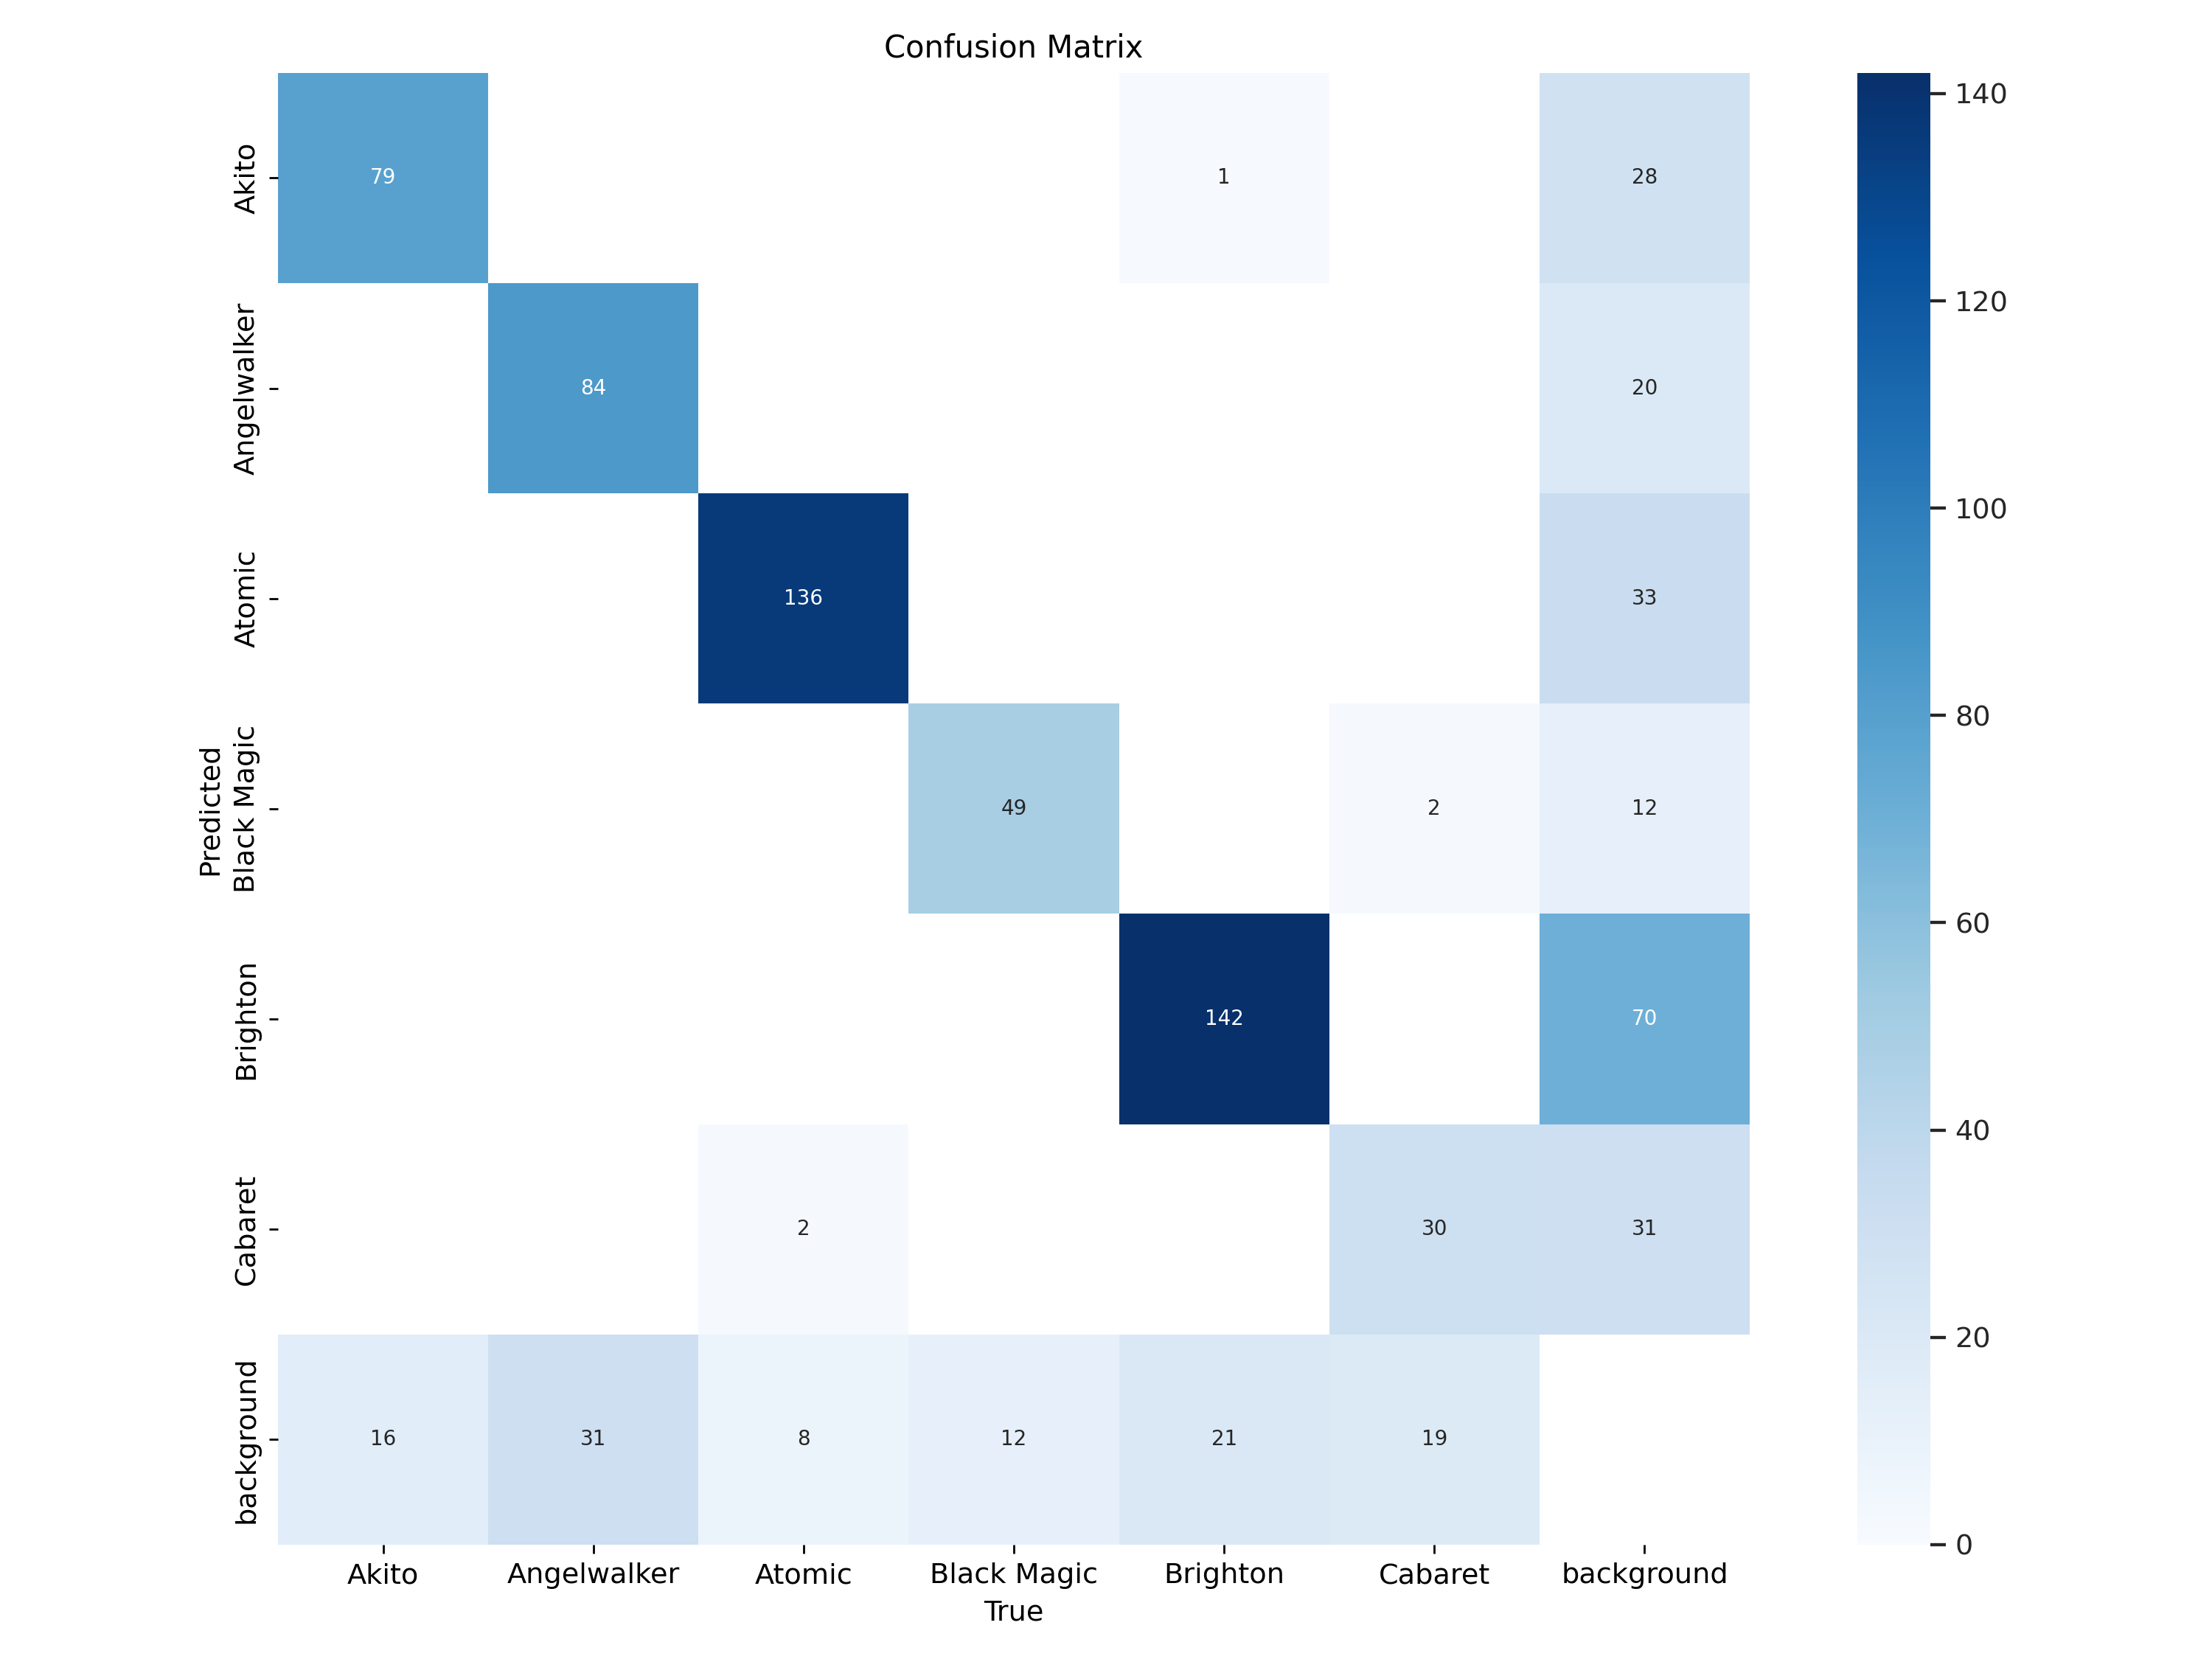

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

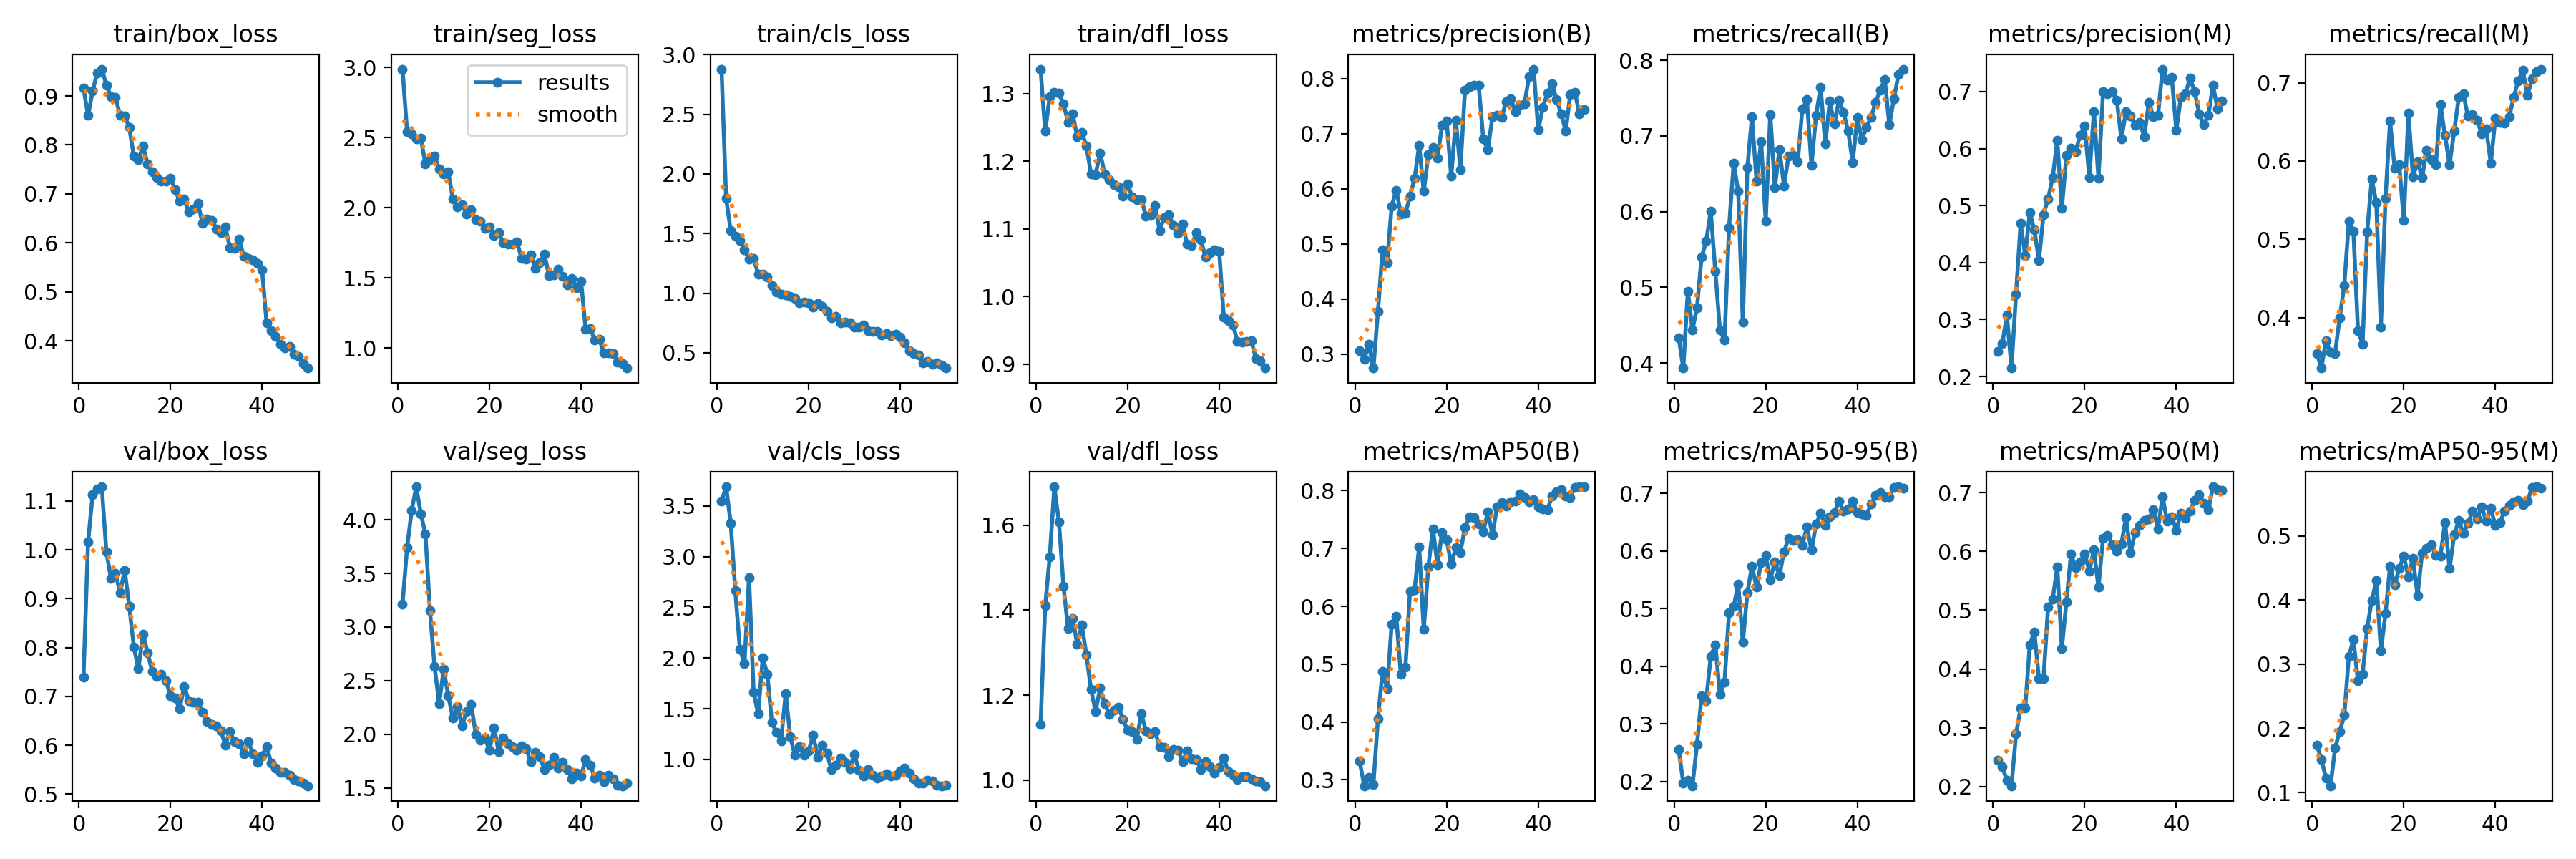

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/results.png', width=600)

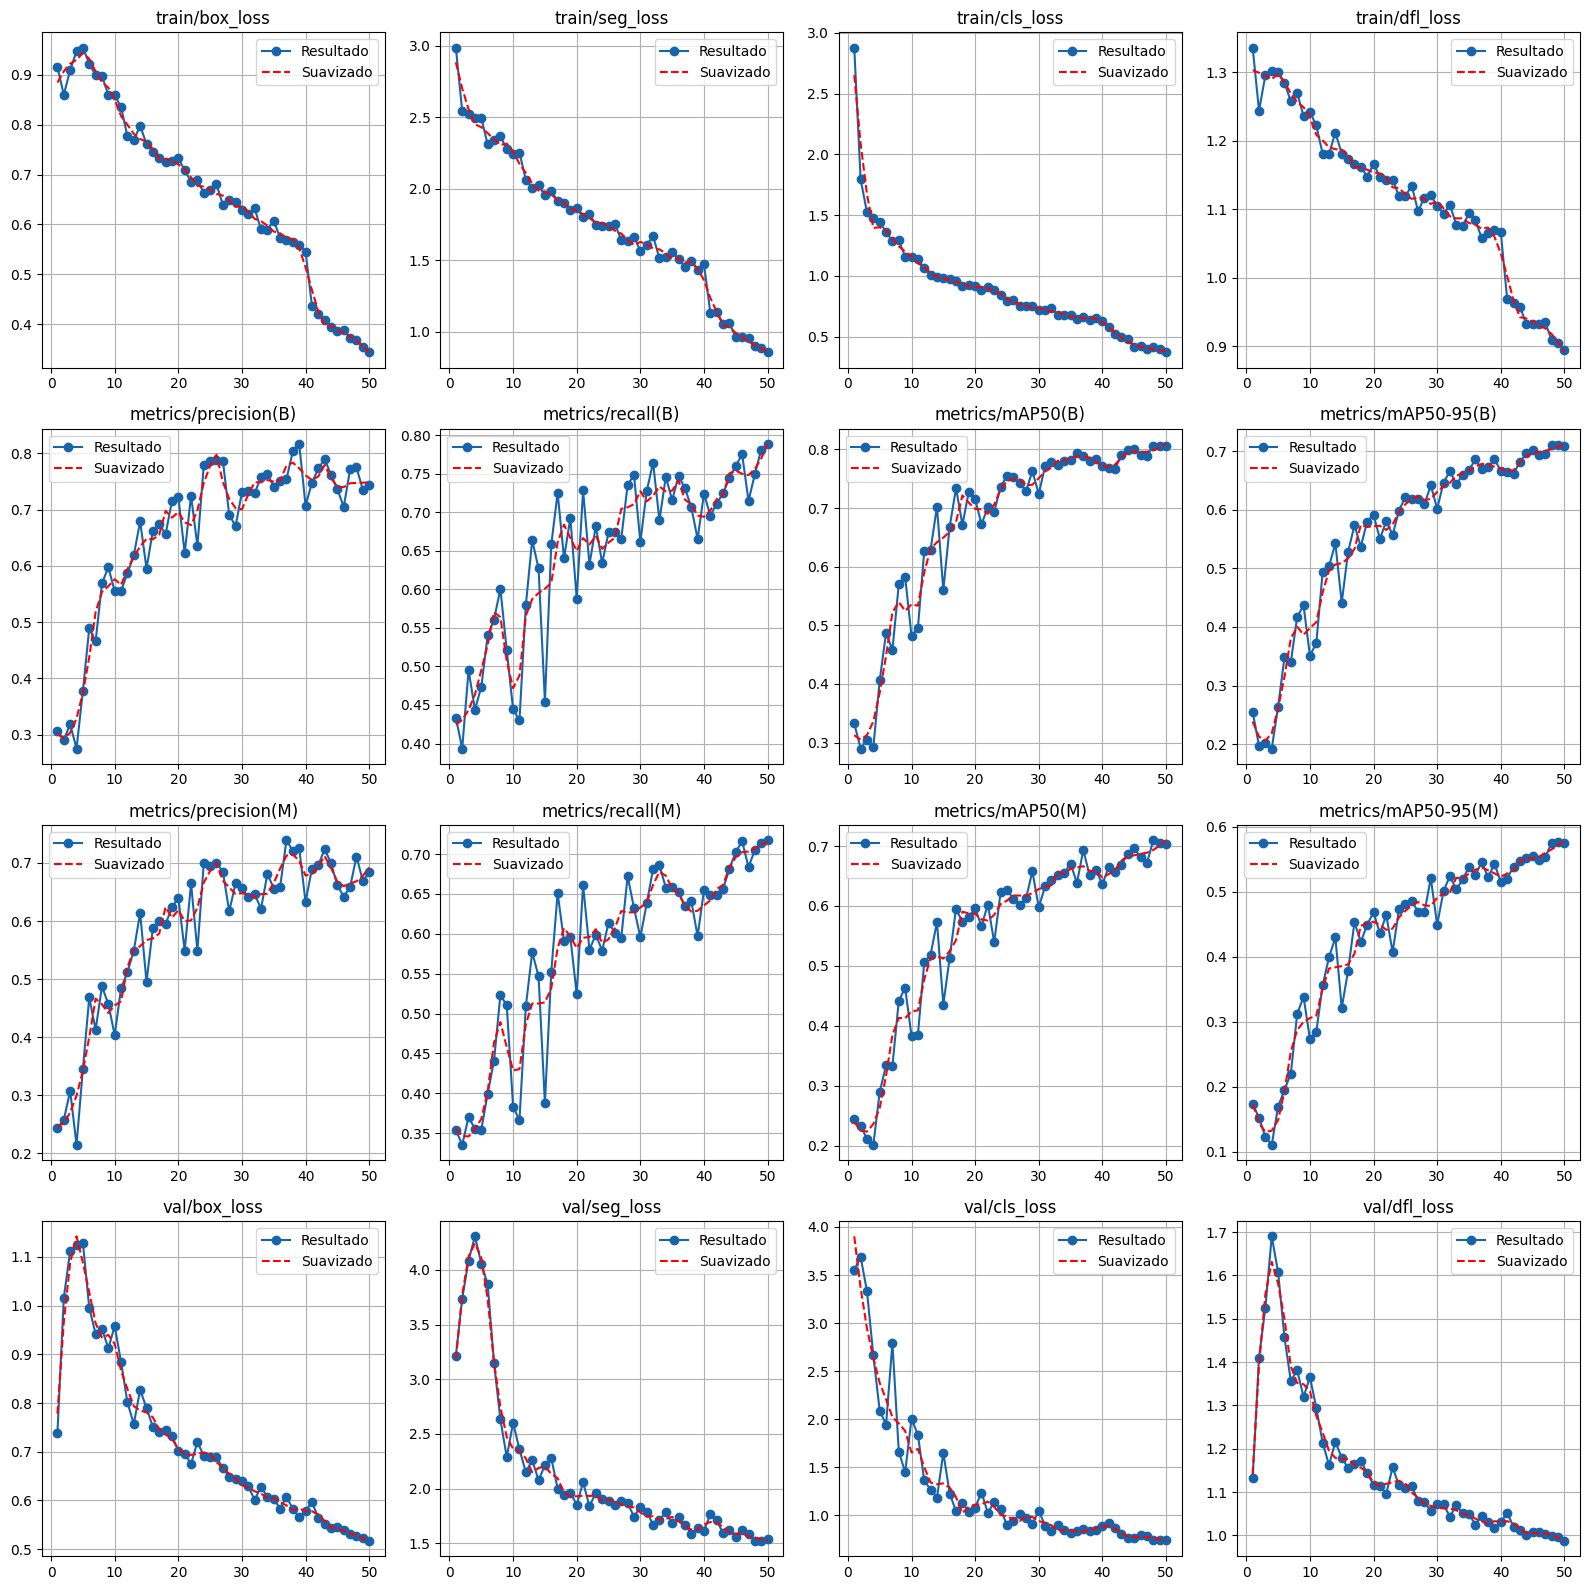

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter  # Para suavizado

# Cargar datos desde el archivo results.csv
results_file = f'{HOME}/runs/segment/train/results.csv'
data = pd.read_csv(results_file)

# Configurar la matriz 4x4
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

# Lista de métricas disponibles en el archivo
metrics = list(data.columns[2:])  # Omitimos la primera columna (épocas)

# Definir el color personalizado
custom_color = (24 / 255, 100 / 255, 171 / 255)  # Azul oscuro

# Graficar métricas
for i, ax in enumerate(axes.flat):
    if i < len(metrics):  # Solo graficar si hay métricas disponibles
        # Datos originales
        ax.plot(data['epoch'], data[metrics[i]], label='Resultado', color=custom_color, marker='o')

        # Línea suavizada usando Savitzky-Golay
        y_smoothed = savgol_filter(data[metrics[i]], window_length=7, polyorder=2)  # Ventana de 7 puntos y orden 2
        ax.plot(data['epoch'], y_smoothed, color='red', linestyle='--', label='Suavizado')

        # Configuraciones adicionales
        ax.set_title(metrics[i])
        ax.grid(True)
        ax.legend(loc="best")
    else:
        ax.axis('off')  # Dejar en blanco las celdas vacías

plt.tight_layout()
plt.show()


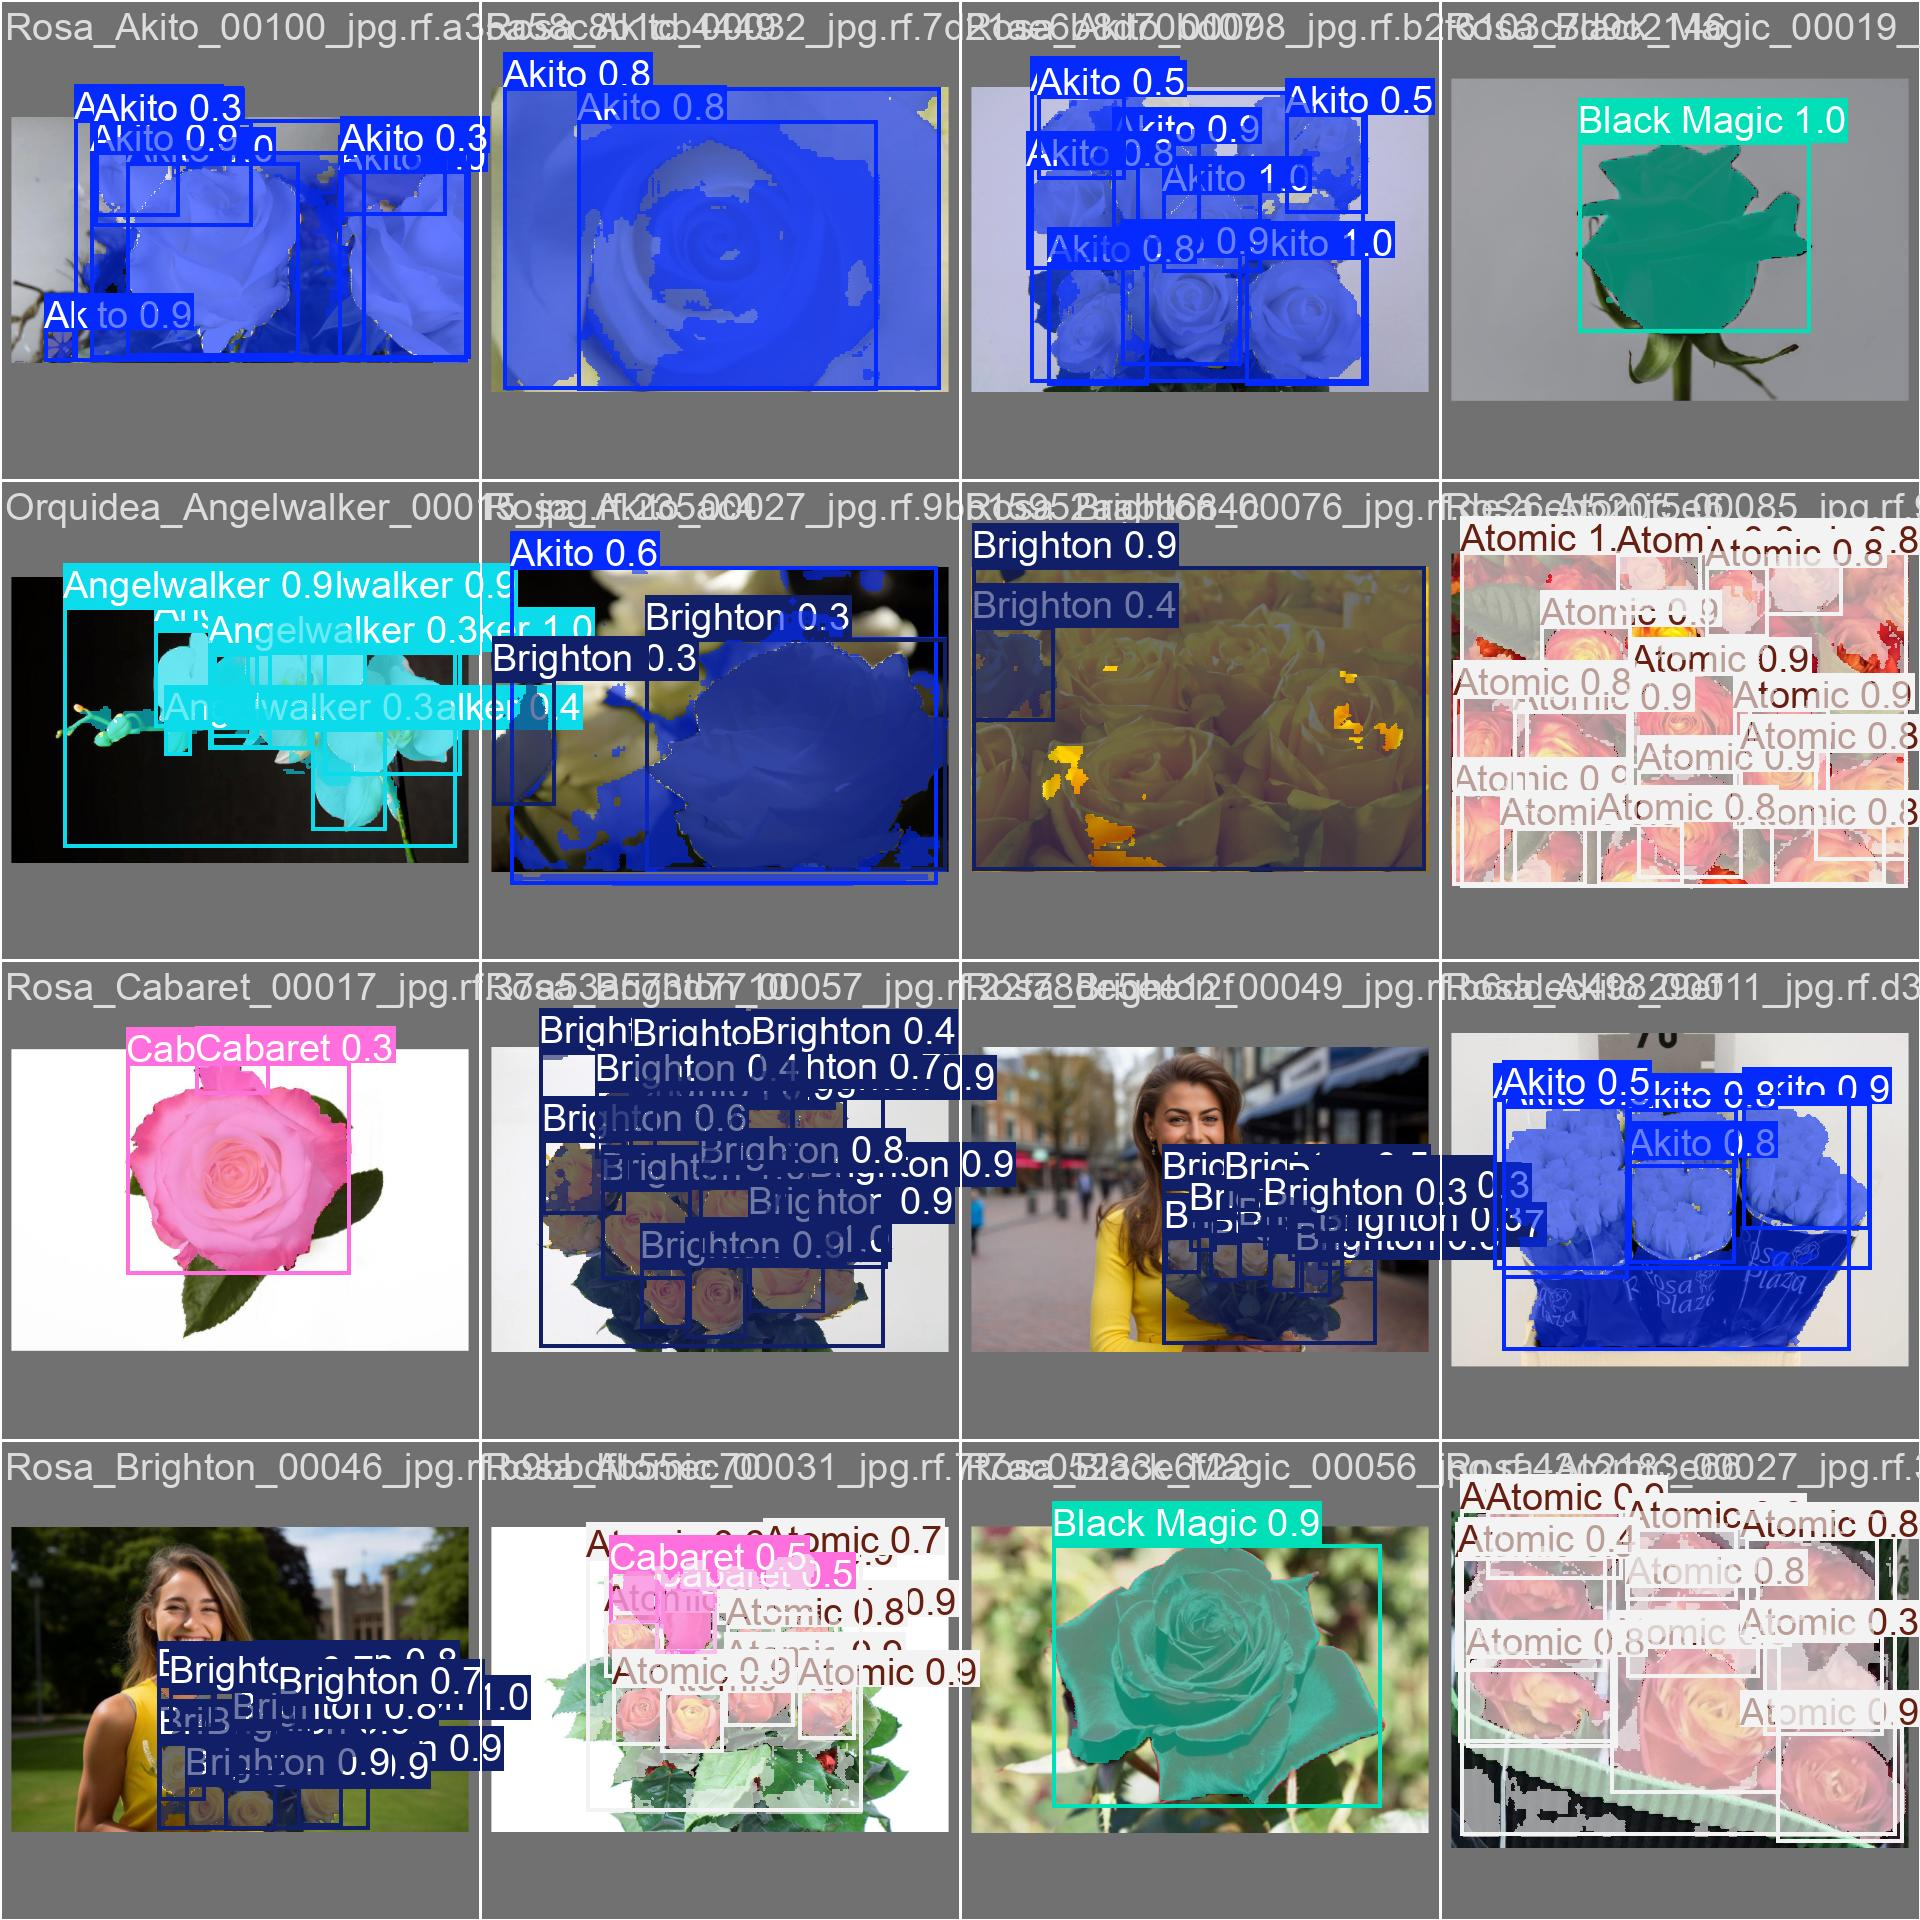

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,069,138 parameters, 0 gradients, 35.3 GFLOPs
val: Scanning /content/datasets/DataFlower-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100% 117/117 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/DataFlower-1/valid/images/Orquidea_Angelwalker_00037_jpg.rf.2f8e64342fd842878552f7720808239f.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 8/8 [00:06<00:00,  1.16it/s]
                   all        117        632      0.841      0.701      0.808      0.709      0.658      0.728      0.705      0.576
                 Akito         21         95      0.908      0.758      0.872      0.738     

## Inference with custom model

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


**NOTE:** Let's take a look at few results.

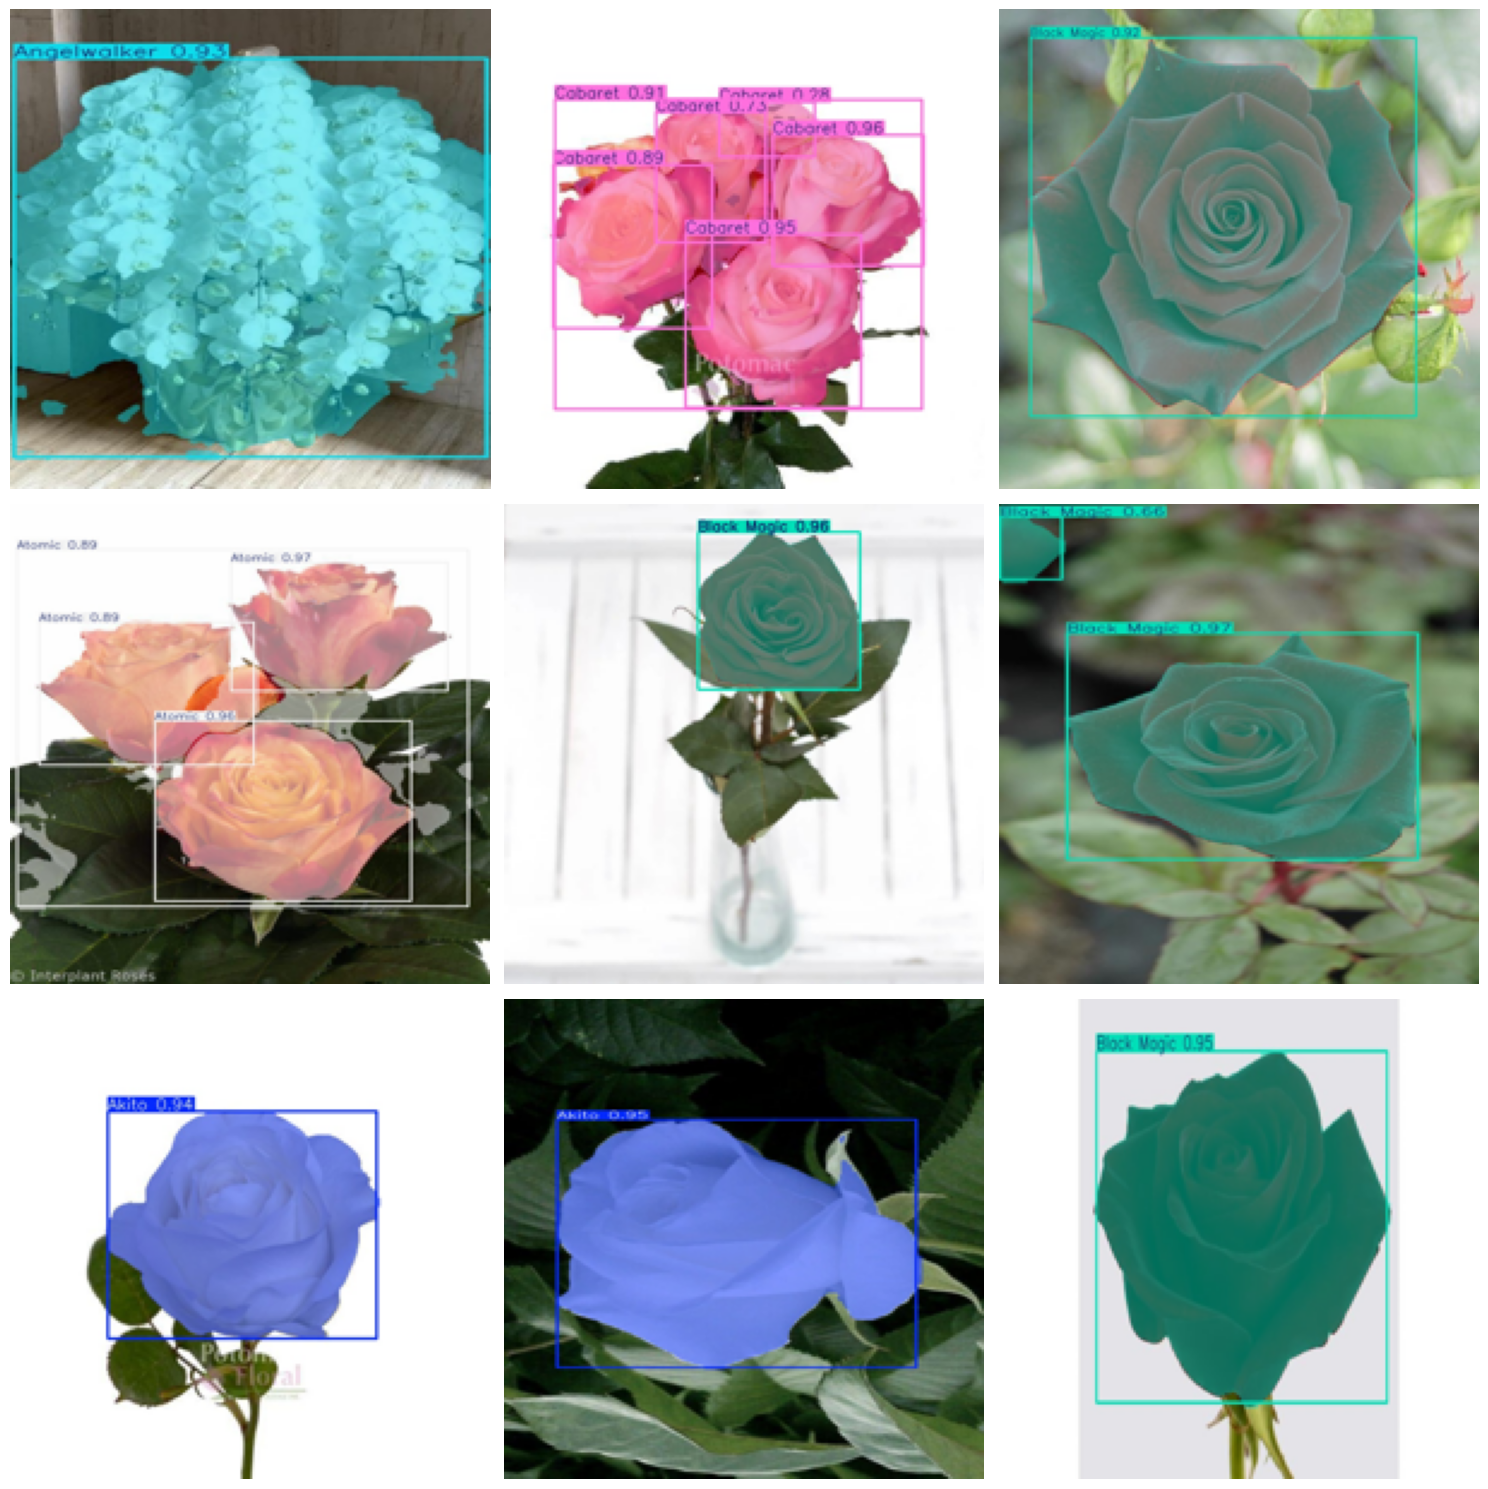

In [ ]:
import glob
import os
import matplotlib.pyplot as plt
from PIL import Image

# Obtener la carpeta más reciente con predicciones
latest_folder = max(glob.glob(f'{HOME}/runs/segment/predict*/'), key=os.path.getmtime)

# Obtener todas las imágenes en la carpeta
images = glob.glob(f'{latest_folder}/*.jpg')

# Configurar la cuadrícula 5x5
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))  # Tamaño de la figura

# Mostrar imágenes redimensionadas
for i, ax in enumerate(axes.flat):
    if i < len(images):
        # Abrir la imagen y redimensionarla
        img = Image.open(images[i])
        img = img.resize((200, 200))
        ax.imshow(img)
        ax.axis('off')  # Ocultar ejes
    else:
        ax.axis('off')  # Ocultar cualquier celda vacía

plt.tight_layout()
plt.show()


In [ ]:
!ls runs/segment/predict

Orquidea_Angelwalker_00001_jpg.rf.0324840d9f5905a8cf05824579d5e398.jpg
Orquidea_Angelwalker_00011_jpg.rf.aa44dd593161131c0d37167f786817f3.jpg
Orquidea_Angelwalker_00033_jpg.rf.77f4306f9072c76623785dbcfe70dce1.jpg
Orquidea_Angelwalker_00040_jpg.rf.6f4f648213b32355f3c801f606cb8935.jpg
Orquidea_Angelwalker_00044_jpg.rf.4e37bb0d61cb3fa966fff7e6c078c494.jpg
Orquidea_Angelwalker_00052_jpg.rf.8cb02b3f177261ca3bfd45fb79ab7aab.jpg
Orquidea_Angelwalker_00083_jpg.rf.b83208d07b1c0dd9acbe52f57a34af0d.jpg
Orquidea_Angelwalker_00092_jpg.rf.c5b4bf244398d6c2683a02dc8b3390d5.jpg
Orquidea_Angelwalker_00099_jpg.rf.4110a134fb6bff5a8a79032454f1a608.jpg
Rosa_Akito_00002_jpg.rf.bd44f6d4ce5fb6ba93f6ac8ddfdf4e2f.jpg
Rosa_Akito_00025_jpg.rf.69e375e01fb7a88fc30457201c378f1b.jpg
Rosa_Akito_00031_jpg.rf.740b281b3d8cf67cdf60bb484c956d57.jpg
Rosa_Akito_00037_jpg.rf.de954c69d3a44febc545cc50b91cafa2.jpg
Rosa_Akito_00040_jpg.rf.1c108b94c85050bd66ec30465f492a34.jpg
Rosa_Akito_00047_jpg.rf.5c1f9090aadd3d7cf693259543e59b45

In [ ]:
!ls /content/datasets/DataFlower-1/valid/images/Rosa_Brighton_00002_jpg.rf.0abb51c2d807b4c6c41bd552e0ce9e98.jpg

/content/datasets/DataFlower-1/valid/images/Rosa_Brighton_00002_jpg.rf.0abb51c2d807b4c6c41bd552e0ce9e98.jpg


In [ ]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO(f'{HOME}/runs/segment/train/weights/best.pt')
image = Image.open("/content/datasets/DataFlower-1/valid/images/Rosa_Brighton_00002_jpg.rf.0abb51c2d807b4c6c41bd552e0ce9e98.jpg")
result = model.predict(image, conf=0.25)[0]


0: 640x480 11 Brightons, 99.9ms
Speed: 8.4ms preprocess, 99.9ms inference, 926.2ms postprocess per image at shape (1, 3, 640, 480)


In [ ]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

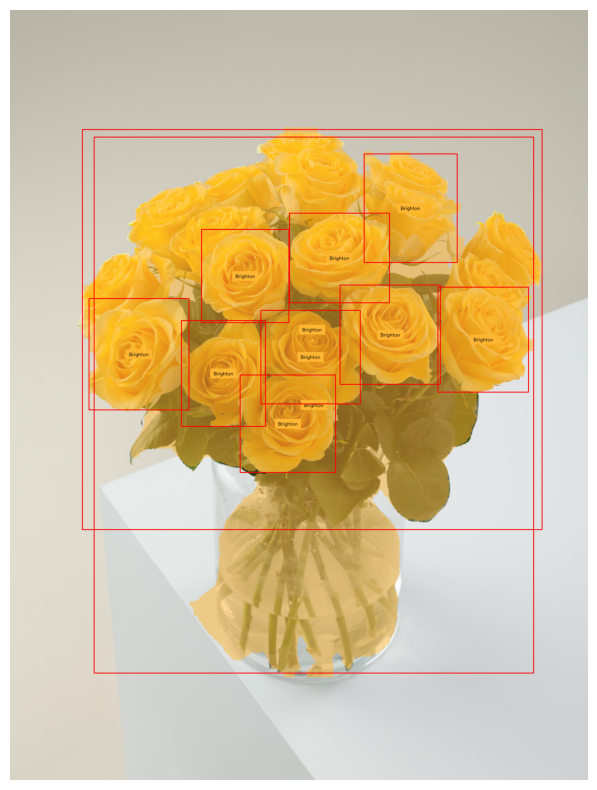

In [ ]:
from supervision import BoxAnnotator

# Crear anotadores para máscaras, etiquetas y bounding boxes
mask_annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK, text_position=sv.Position.CENTER)
box_annotator = sv.BoxAnnotator(color=sv.Color.RED, thickness=2)  # Bounding boxes en rojo con grosor de 2

# Copiar la imagen original para anotaciones
annotated_image = image.copy()

# Anotar máscaras y etiquetas
mask_annotator.annotate(annotated_image, detections=detections)
label_annotator.annotate(annotated_image, detections=detections)

# Anotar bounding boxes
box_annotator.annotate(annotated_image, detections=detections)

# Mostrar la imagen anotada
sv.plot_image(annotated_image, size=(10, 10))


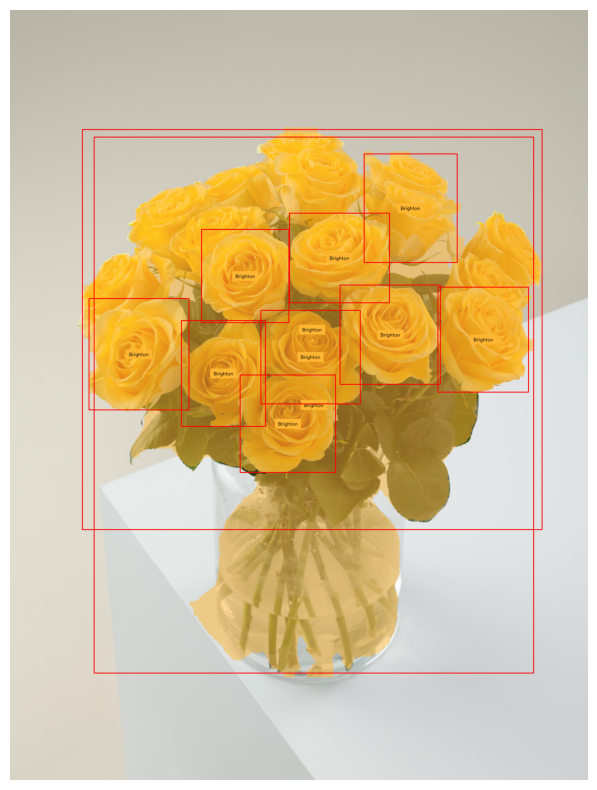

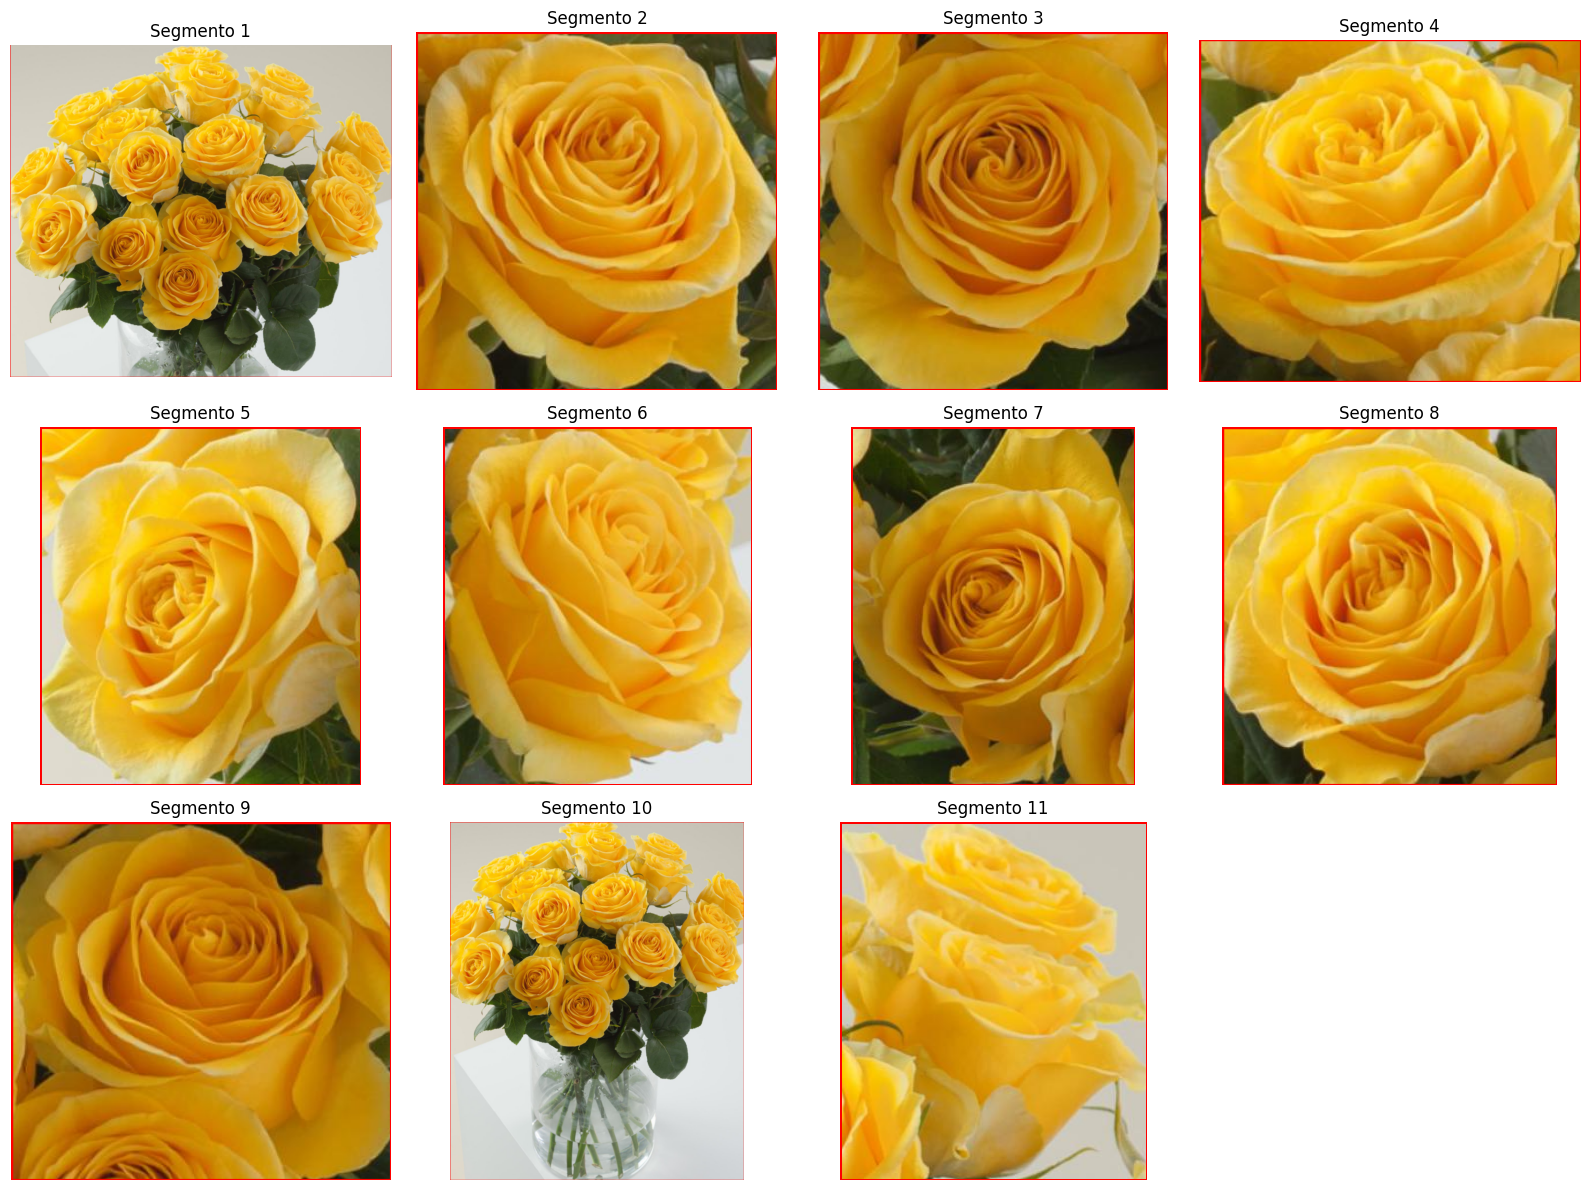

In [ ]:
import matplotlib.pyplot as plt
from PIL import ImageDraw

# Crear anotadores para máscaras, etiquetas y bounding boxes
mask_annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK, text_position=sv.Position.CENTER)
box_annotator = sv.BoxAnnotator(color=sv.Color.RED, thickness=2)

# Copiar la imagen original para anotaciones generales
annotated_image = image.copy()

# Anotar máscaras, etiquetas y bounding boxes en la imagen principal
mask_annotator.annotate(annotated_image, detections=detections)
label_annotator.annotate(annotated_image, detections=detections)
box_annotator.annotate(annotated_image, detections=detections)

# Mostrar la imagen principal anotada
sv.plot_image(annotated_image, size=(10, 10))

# Crear una matriz de 4 columnas para mostrar segmentos individuales
rows = (len(detections.xyxy) + 3) // 4  # Calcula el número de filas necesarias
fig, axes = plt.subplots(rows, 4, figsize=(16, 4 * rows))  # Tamaño dinámico

for i, ax in enumerate(axes.flat):
    if i < len(detections.xyxy):
        # Obtener coordenadas del bounding box (x1, y1, x2, y2)
        bbox = detections.xyxy[i]
        x1, y1, x2, y2 = map(int, bbox)

        # Recortar el segmento de la imagen original
        cropped_segment = image.crop((x1, y1, x2, y2))

        # Dibujar bounding box sobre el segmento
        draw = ImageDraw.Draw(cropped_segment)
        draw.rectangle([(0, 0), (x2 - x1, y2 - y1)], outline="red", width=2)

        # Mostrar el segmento en la celda correspondiente
        ax.imshow(cropped_segment)
        ax.axis('off')  # Ocultar ejes
        ax.set_title(f"Segmento {i + 1}")
    else:
        ax.axis('off')  # Dejar celdas vacías sin contenido

plt.tight_layout()
plt.show()
